In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional

In [2]:
class Solution1:
    def isValid(self, s: str) -> bool:
        stack = []
        closeToOpen = {")" : "(", "]" : "[", "}" : "{"}
        for c in s:
            if c in closeToOpen:
                if stack and stack[-1] == closeToOpen[c]:
                    stack.pop()
                else:
                    return False
            else:
                stack.append(c)
        return True if not stack else False

In [140]:
class Solution:
    def isValid(self, s: str) -> bool:
        stack = []
        closeToOpen = {")" : "("}
        for c in s:
            if c in closeToOpen:
                if stack and stack[-1] == closeToOpen[c]:
                    stack.pop()
                else:
                    return False
            else:
                stack.append(c)
        return True if not stack else False
    def generateParenthesis(self, n: int) -> List[str]:
        res = []

        for i in range(2**(2*n)):
            s = bin(i)[2:].rjust(2*n, '0')
            new_s = s.replace('0','(').replace('1',')')
            # print(new_s)
            if self.isValid(new_s):
                res.append(new_s)

        return res

In [141]:
n = 3

In [142]:
sol = Solution()
res = sol.generateParenthesis(n)
res

['((()))', '(()())', '(())()', '()(())', '()()()']

In [143]:
for i in range(1, 8+1):
    print(i, len(sol.generateParenthesis(i)))

1 1
2 2
3 5
4 14
5 42
6 132
7 429
8 1430


In [152]:
for i in range(1, 8):
    print(np.diff([1, 2, 5, 14, 42, 132, 429, 1430], i))

[   1    3    9   28   90  297 1001]
[  2   6  19  62 207 704]
[  4  13  43 145 497]
[  9  30 102 352]
[ 21  72 250]
[ 51 178]
[127]


In [6]:
list(map(lambda x: int(x, 2), [
    "000111",
    "001011",
    "001101",
    "010011",
    "010101",
]))

[7, 11, 13, 19, 21]

In [7]:
"""
123456 6
((())) 123 456
(()()) 124 356
(())() 125 346
()(()) 134 256
()()() 135 246

000111
001011
001101
010011
010101

00 01 11     013
00 10 11     023
00 11 01     031
01 00 11     103
01 01 01     111

000 111      07
001 011      13
001 101      15
010 011      22
010 101      25



01 01 01
01 01 10
01 00 11
01 11 00
01 10 01


000 111 7  4
001 011 11 2
001 101 13 6
010 011 19 18
010 101 37

000 0 111 7
001 1 011 3
001 1 101 5
010 2 011 2
010 2 101 5

"""

'\n123456 6\n((())) 123 456\n(()()) 124 356\n(())() 125 346\n()(()) 134 256\n()()() 135 246\n\n000111\n001011\n001101\n010011\n010101\n\n00 01 11     013\n00 10 11     023\n00 11 01     031\n01 00 11     103\n01 01 01     111\n\n000 111      07\n001 011      13\n001 101      15\n010 011      22\n010 101      25\n\n\n\n01 01 01\n01 01 10\n01 00 11\n01 11 00\n01 10 01\n\n\n000 111 7  4\n001 011 11 2\n001 101 13 6\n010 011 19 18\n010 101 37\n\n000 0 111 7\n001 1 011 3\n001 1 101 5\n010 2 011 2\n010 2 101 5\n\n'

In [8]:
"""
000111  001232
001011  011222
001101  012221
010011  111122
010101  112121

000111  123210
001011  121210
001101  121010
010011  101220
010101  101010

"""

'\n000111  001232\n001011  011222\n001101  012221\n010011  111122\n010101  112121\n\n000111  123210\n001011  121210\n001101  121010\n010011  101220\n010101  101010\n\n'

In [9]:
n = 6
for i in range(2**n):
    s = bin(i)[2:].rjust(n, '0')
    sm = sum(map(int, list(s)))
    if sm == 3:
        if s[0] == '0' and s[-1] == '1':
            new_s = s.replace('0','(').replace('1',')')
            print(f"{s} = {int(s, 2)} -- {Solution1().isValid(new_s)}")

000111 = 7 -- True
001011 = 11 -- True
001101 = 13 -- True
010011 = 19 -- True
010101 = 21 -- True
011001 = 25 -- False


In [35]:
n = 2*5
int_list = []
bint_list = []

for i in range(2**n):
    s = bin(i)[2:].rjust(n, '0')
    new_s = s.replace('0','(').replace('1',')')
    if Solution1().isValid(new_s):
        int_list.append(int(s, 2))

        bint = list(map(int, list(s)))
        bint_list.append(bint)
        bint = np.array(bint)
        bint[bint == 1] = -1
        bint[bint == 0] = 1
        
        print(f"{s} = {int(s, 2)} -- {np.cumsum(bint)}")

0000011111 = 31 -- [1 2 3 4 5 4 3 2 1 0]
0000101111 = 47 -- [1 2 3 4 3 4 3 2 1 0]
0000110111 = 55 -- [1 2 3 4 3 2 3 2 1 0]
0000111011 = 59 -- [1 2 3 4 3 2 1 2 1 0]
0000111101 = 61 -- [1 2 3 4 3 2 1 0 1 0]
0001001111 = 79 -- [1 2 3 2 3 4 3 2 1 0]
0001010111 = 87 -- [1 2 3 2 3 2 3 2 1 0]
0001011011 = 91 -- [1 2 3 2 3 2 1 2 1 0]
0001011101 = 93 -- [1 2 3 2 3 2 1 0 1 0]
0001100111 = 103 -- [1 2 3 2 1 2 3 2 1 0]
0001101011 = 107 -- [1 2 3 2 1 2 1 2 1 0]
0001101101 = 109 -- [1 2 3 2 1 2 1 0 1 0]
0001110011 = 115 -- [1 2 3 2 1 0 1 2 1 0]
0001110101 = 117 -- [1 2 3 2 1 0 1 0 1 0]
0010001111 = 143 -- [1 2 1 2 3 4 3 2 1 0]
0010010111 = 151 -- [1 2 1 2 3 2 3 2 1 0]
0010011011 = 155 -- [1 2 1 2 3 2 1 2 1 0]
0010011101 = 157 -- [1 2 1 2 3 2 1 0 1 0]
0010100111 = 167 -- [1 2 1 2 1 2 3 2 1 0]
0010101011 = 171 -- [1 2 1 2 1 2 1 2 1 0]
0010101101 = 173 -- [1 2 1 2 1 2 1 0 1 0]
0010110011 = 179 -- [1 2 1 2 1 0 1 2 1 0]
0010110101 = 181 -- [1 2 1 2 1 0 1 0 1 0]
0011000111 = 199 -- [1 2 1 0 1 2 3 2 1 0]
0

In [33]:
np.cumsum(list(map(int, list(s))))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

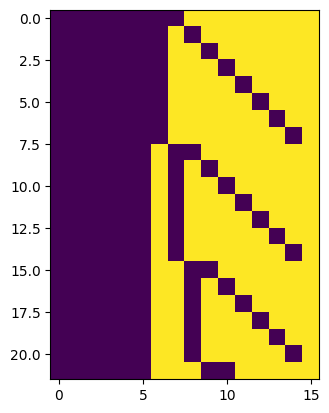

In [11]:
plt.imshow(list(map(lambda x: list(map(int, x)), """0000000011111111
0000000101111111
0000000110111111
0000000111011111
0000000111101111
0000000111110111
0000000111111011
0000000111111101
0000001001111111
0000001010111111
0000001011011111
0000001011101111
0000001011110111
0000001011111011
0000001011111101
0000001100111111
0000001101011111
0000001101101111
0000001101110111
0000001101111011
0000001101111101
0000001110011111""".split('\n'))))

In [12]:
int_list = np.array(int_list)
bint_list = np.array(bint_list)

In [13]:
int_list.shape

(1430,)

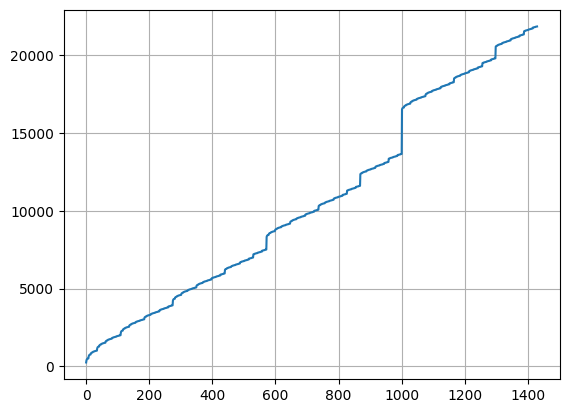

In [14]:
plt.plot(int_list)
plt.grid()

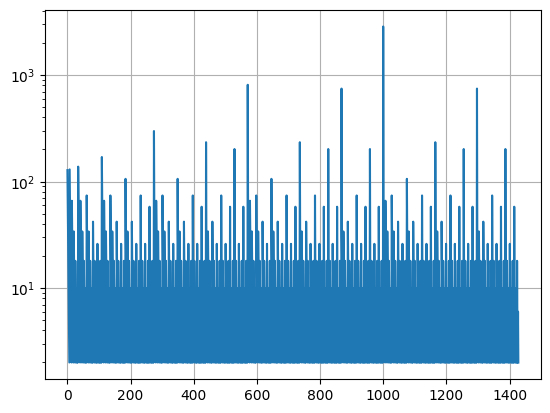

In [15]:
plt.plot(np.diff(int_list))
plt.semilogy()
plt.grid()

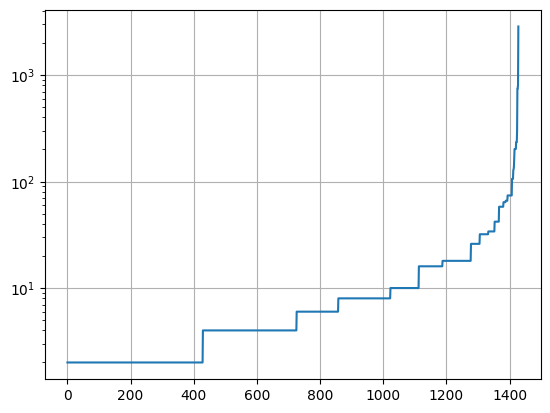

In [16]:
plt.plot(np.sort(np.diff(int_list)))
plt.semilogy()
plt.grid()

In [17]:
np.unique(np.diff(int_list))

array([   2,    4,    6,    8,   10,   16,   18,   26,   32,   34,   42,
         58,   64,   66,   74,  106,  128,  130,  138,  170,  202,  234,
        298,  746,  810, 2858])

In [18]:
sum(map(int, list('111011')))

5

In [19]:
"000111".replace('0','(').replace('1',')')

'((()))'

In [20]:
"""
000111
001011
001101
010011
010101


01

0011
0101


"""

'\n000111\n001011\n001101\n010011\n010101\n\n\n01\n\n0011\n0101\n\n\n'

In [21]:
bint_list.shape

(1430, 16)

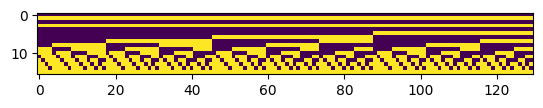

In [22]:
plt.imshow(bint_list[1300:1300+150].T)

In [23]:
bint_list

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 1]])

In [24]:
1430

1430

In [25]:
13*11*10

1430

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [52]:
n = 2*5
int_list = []
bint_list = []
bint_cumsum_list = []
isValid_list = []

for i in range(2**n):
    s = bin(i)[2:].rjust(n, '0')
    new_s = s.replace('0','(').replace('1',')')

    isValid = int(Solution1().isValid(new_s))
    isValid_list.append(isValid)

    int_list.append(int(s, 2))

    bint = list(map(int, list(s)))
    bint_list.append(bint)

    bint = np.array(bint)
    bint[bint == 1] = -1
    bint[bint == 0] = 1
    bint_cumsum = np.cumsum(bint)
    bint_cumsum_list.append(bint_cumsum)
    print(f"{s} = {int(s, 2)} -- {bint_cumsum} -- {isValid}")

isValid_list = np.array(isValid_list)
bint_list = np.array(bint_list)
bint_cumsum_list = np.array(bint_cumsum_list)

0000000000 = 0 -- [ 1  2  3  4  5  6  7  8  9 10] -- 0
0000000001 = 1 -- [1 2 3 4 5 6 7 8 9 8] -- 0
0000000010 = 2 -- [1 2 3 4 5 6 7 8 7 8] -- 0
0000000011 = 3 -- [1 2 3 4 5 6 7 8 7 6] -- 0
0000000100 = 4 -- [1 2 3 4 5 6 7 6 7 8] -- 0
0000000101 = 5 -- [1 2 3 4 5 6 7 6 7 6] -- 0
0000000110 = 6 -- [1 2 3 4 5 6 7 6 5 6] -- 0
0000000111 = 7 -- [1 2 3 4 5 6 7 6 5 4] -- 0
0000001000 = 8 -- [1 2 3 4 5 6 5 6 7 8] -- 0
0000001001 = 9 -- [1 2 3 4 5 6 5 6 7 6] -- 0
0000001010 = 10 -- [1 2 3 4 5 6 5 6 5 6] -- 0
0000001011 = 11 -- [1 2 3 4 5 6 5 6 5 4] -- 0
0000001100 = 12 -- [1 2 3 4 5 6 5 4 5 6] -- 0
0000001101 = 13 -- [1 2 3 4 5 6 5 4 5 4] -- 0
0000001110 = 14 -- [1 2 3 4 5 6 5 4 3 4] -- 0
0000001111 = 15 -- [1 2 3 4 5 6 5 4 3 2] -- 0
0000010000 = 16 -- [1 2 3 4 5 4 5 6 7 8] -- 0
0000010001 = 17 -- [1 2 3 4 5 4 5 6 7 6] -- 0
0000010010 = 18 -- [1 2 3 4 5 4 5 6 5 6] -- 0
0000010011 = 19 -- [1 2 3 4 5 4 5 6 5 4] -- 0
0000010100 = 20 -- [1 2 3 4 5 4 5 4 5 6] -- 0
0000010101 = 21 -- [1 2 3 4 5 4 5 

In [83]:
X = np.hstack([bint_cumsum_list])
y = isValid_list
X, y

(array([[  1,   2,   3, ...,   8,   9,  10],
        [  1,   2,   3, ...,   8,   9,   8],
        [  1,   2,   3, ...,   8,   7,   8],
        ...,
        [ -1,  -2,  -3, ...,  -8,  -7,  -8],
        [ -1,  -2,  -3, ...,  -8,  -9,  -8],
        [ -1,  -2,  -3, ...,  -8,  -9, -10]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [107]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
y_pred = dt.predict(X_test)

In [109]:
dt.score(X_test, y_test)

1.0

In [110]:
dt.feature_importances_

array([0.18381154, 0.        , 0.00352557, 0.05870123, 0.00487197,
       0.        , 0.1486711 , 0.        , 0.37287577, 0.22754282])

In [111]:
X_train[0]

array([ 1,  2,  1,  0, -1,  0,  1,  2,  1,  0])

In [115]:
y_train[0]

0